#  Analysis of Accident Severity

## Business Objective:
The primary aim of our study is to analyze and determine the extent of severity of accidents that took place throughout the year 2021. We intend to assess the likelihood of the damage occured to the car being involved in such accidents and evaluate its severity. By examining the collected data and analyzing various factors, we aim to provide insights into the severity levels of accidents


##  Importing Liabraries

In [1]:
#To import libraries and Packages.
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## Dataset

In [2]:
#To Read the data.
accident = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-2021.csv',
                       low_memory=False)
casualty = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-2021.csv',
                       low_memory=False)
vehicle = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-vehicle-2021.csv',
                      low_memory=False)

The code is reading three separate CSV files ('Accident', 'Casualty', and 'Vehicle') containing road accident data for the year 2021. The data is fetched from the provided URLs. The 'low_memory=False' parameter is used to ensure better control over datatype inference during the data loading process. Each file is read into a separate DataFrame: 'accident', 'casualty', and 'vehicle'.


In [3]:
#To validate dataframe.
accident.shape

(101087, 36)

There are 101087 accident cases and 36 variables explaining it.

In [4]:
# To display the first 10 rows of the 'accident' DataFrame.
accident.head(10)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010287148,2021,010287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010287149,2021,010287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010287151,2021,010287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010287155,2021,010287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010287157,2021,010287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608
5,2021010287163,2021,010287163,536569.0,183334.0,-0.032448,51.532404,1,2,2,...,4,4,1,1,0,0,1,1,2,E01004228
6,2021010287167,2021,010287167,531818.0,188393.0,-0.099009,51.578996,1,3,2,...,0,1,9,1,0,0,1,1,2,E01002047
7,2021010287168,2021,010287168,541068.0,190017.0,0.035049,51.591350,1,3,2,...,8,1,8,2,0,0,1,1,2,E01003764
8,2021010287185,2021,010287185,530553.0,162637.0,-0.126757,51.347826,1,2,1,...,0,1,1,1,0,0,1,1,2,E01004085
9,2021010287189,2021,010287189,543401.0,186128.0,0.067118,51.555817,1,3,2,...,9,7,9,9,9,9,1,3,2,E01003728


In [5]:
# To display the first 10 rows of the 'vehicle' DataFrame.
vehicle.head(10)

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010287148,2021,010287148,1,9,0,17,1,5,0,...,1,19,4,999,1,3,VOLKSWAGEN GOLF,10,1,E01023551
1,2021010287148,2021,010287148,2,9,0,2,0,0,0,...,3,-1,-1,1499,1,2,BMW 1 SERIES,-1,-1,-1
2,2021010287148,2021,010287148,3,9,0,2,0,0,0,...,3,-1,-1,-1,3,1,SMART FORTWO,-1,-1,-1
3,2021010287149,2021,010287149,1,9,0,18,3,7,0,...,1,32,6,2967,2,11,AUDI Q7,-1,-1,-1
4,2021010287149,2021,010287149,2,9,0,18,5,1,0,...,1,21,5,1598,1,11,VAUXHALL ASTRA,3,1,E01004202
5,2021010287151,2021,010287151,1,9,0,6,7,7,0,...,1,27,6,1998,8,4,BMW 5 SERIES,2,1,E01002056
6,2021010287151,2021,010287151,2,9,0,18,3,7,0,...,1,27,6,1498,1,2,SEAT LEON,2,1,E01003024
7,2021010287155,2021,010287155,1,9,0,18,1,5,0,...,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,2021010287157,2021,010287157,1,9,0,18,2,6,0,...,1,37,7,-1,-1,-1,-1,3,1,E01002598
9,2021010287157,2021,010287157,2,9,0,2,0,0,0,...,3,-1,-1,1995,1,11,BMW 1 SERIES,-1,-1,-1


In [6]:
#To display the first 10 rows of the 'casualty' DataFrame.
casualty.head(10)

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2021010287148,2021,010287148,1,1,1,1,19,4,3,0,0,0,0,0,9,1,10,E01023551
1,2021010287149,2021,010287149,1,1,2,1,25,5,3,0,0,1,0,0,9,1,5,E01003955
2,2021010287149,2021,010287149,2,2,1,1,21,5,3,0,0,0,0,0,9,1,3,E01004202
3,2021010287149,2021,010287149,2,3,2,1,17,4,2,0,0,1,0,0,9,1,2,E01004295
4,2021010287151,2021,010287151,1,1,1,1,27,6,3,0,0,0,0,0,9,1,2,E01002056
5,2021010287151,2021,010287151,2,2,1,1,27,6,2,0,0,0,0,0,9,1,2,E01003024
6,2021010287151,2021,010287151,2,3,2,1,28,6,3,0,0,2,0,0,9,1,3,E01003025
7,2021010287151,2021,010287151,2,4,2,1,20,4,3,0,0,1,0,0,9,1,3,E01003143
8,2021010287155,2021,010287155,1,1,3,1,49,8,1,4,9,0,0,0,0,-1,-1,-1
9,2021010287157,2021,010287157,1,1,1,1,37,7,3,0,0,0,0,0,9,1,3,E01002598


It provides a preview of the datasets, allowing for a quick inspection of the column names and sample records.


## Merging Data (Feature Engineering)
The three datasets are merged together inorder to find the significant variables for predicting the target variable that is accident_severity.

In [7]:
# To merge datasets.
final=accident.merge(vehicle,on='accident_index',how='left').merge(casualty,on='accident_index',how='left')

* The code merges the 'accident', 'vehicle', and 'casualty' DataFrames based on a common key, 'accident_index'.
* By using the 'merge' function, the data from these three DataFrames is combined into a single DataFrame, 'final'.
* The resulting DataFrame contains information from all three data sources, allowing for comprehensive analysis and insights.


In [8]:
# To drop date
final['Month']=final['date'].str.split('/').str[1]
final['Month']=final['Month'].astype('int')
final=final.drop(['date'],axis=1)

* The code extracts the month from the 'date' column in the 'final' DataFrame.
* It splits the 'date' values by '/' delimiter and selects the second element (index 1) to capture the month.
* The extracted month is then converted to integer datatype using the 'astype' function.
* Finally, the 'date' column is dropped from the 'final' DataFrame using the 'drop' function with axis=1.

## Descriptive Statistics

In [9]:
# To get a summary of the DataFrameV 'Final'
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246314 entries, 0 to 246313
Data columns (total 81 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               246314 non-null  object 
 1   accident_year_x                              246314 non-null  int64  
 2   accident_reference_x                         246314 non-null  object 
 3   location_easting_osgr                        246271 non-null  float64
 4   location_northing_osgr                       246271 non-null  float64
 5   longitude                                    246271 non-null  float64
 6   latitude                                     246271 non-null  float64
 7   police_force                                 246314 non-null  int64  
 8   accident_severity                            246314 non-null  int64  
 9   number_of_vehicles                           246314 non-nul

* The details of the varaibles like description, count, type can be obsevred from the summary. There are 80 variables when the datasets are combined.

In [10]:
final.describe()

,accident_year_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,Month
count,246314.0,246271.000000,2.462710e+05,246271.000000,246271.000000,246314.000000,246314.000000,246314.000000,246314.000000,246314.000000,...,246314.000000,246314.000000,246314.000000,246314.000000,246314.000000,246314.000000,246314.000000,246314.000000,246314.000000,246314.000000
mean,2021.0,453831.529169,2.757591e+05,-1.226661,52.369208,27.782099,2.746636,2.207784,1.744432,4.140487,...,2.808326,0.421316,0.344783,0.239714,0.033534,0.014928,8.403355,1.075225,4.345494,7.001177
std,0.0,93938.294402,1.446766e+05,1.372200,1.303829,23.951850,0.476523,0.919670,1.212181,1.960073,...,0.421616,1.671248,1.522000,0.629515,0.357004,0.174637,11.386367,0.888696,3.174853,3.219908
min,2021.0,67564.000000,1.389800e+04,-7.486852,49.980835,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000
25%,2021.0,391195.500000,1.752060e+05,-2.132730,51.462804,5.000000,3.000000,2.000000,1.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,4.000000
50%,2021.0,458733.000000,2.216460e+05,-1.133013,51.876182,22.000000,3.000000,2.000000,1.000000,4.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000,7.000000
75%,2021.0,529689.000000,3.844550e+05,-0.131001,53.353728,45.000000,3.000000,2.000000,2.000000,6.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000,10.000000
max,2021.0,655140.000000,1.179892e+06,1.755955,60.500008,99.000000,3.000000,13.000000,22.000000,7.000000,...,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000,12.000000


The statistics of the variables can be observed from the above table, We took some relevent continous variables for comparing.

In [11]:
continous_variables = ['number_of_vehicles','number_of_casualties','age_of_driver','engine_capacity_cc','age_of_vehicle']
column = final[continous_variables]

# Descriptive statistics
statistics = column.describe()

# Print the statistics
print(statistics)

       number_of_vehicles  number_of_casualties  age_of_driver  \
count       246314.000000         246314.000000  246314.000000   
mean             2.207784              1.744432      35.353910   
std              0.919670              1.212181      20.581577   
min              1.000000              1.000000      -1.000000   
25%              2.000000              1.000000      23.000000   
50%              2.000000              1.000000      34.000000   
75%              2.000000              2.000000      50.000000   
max             13.000000             22.000000     101.000000   

       engine_capacity_cc  age_of_vehicle  
count       246314.000000   246314.000000  
mean          1214.219793        5.373921  
std           1429.198197        6.364564  
min             -1.000000       -1.000000  
25%             -1.000000       -1.000000  
50%           1296.000000        4.000000  
75%           1798.000000       10.000000  
max          29980.000000       91.000000  


* The number of cars involved in the accidents are mostly 2.
* Atleast 1 casuality is there in most of the accidents.
* The vehicles involved in the accidents are of average 5 years old.

In [12]:
categorical_columns = ['day_of_week', 'time', 'road_type', 'speed_limit', 'vehicle_type', 'sex_of_driver',
                       'driver_home_area_type', 'casualty_severity', 'casualty_type', 'Month','accident_severity']

column2 = final[categorical_columns]

# Descriptive statistics
statistics = column2.describe()
print(statistics)

         day_of_week      road_type    speed_limit   vehicle_type  \
count  246314.000000  246314.000000  246314.000000  246314.000000   
mean        4.140487       5.190302      38.014242      10.531188   
std         1.960073       1.691176      15.051216      12.005004   
min         1.000000       1.000000      20.000000      -1.000000   
25%         2.000000       3.000000      30.000000       9.000000   
50%         4.000000       6.000000      30.000000       9.000000   
75%         6.000000       6.000000      50.000000       9.000000   
max         7.000000       9.000000      70.000000      98.000000   

       sex_of_driver  driver_home_area_type  casualty_severity  casualty_type  \
count  246314.000000          246314.000000      246314.000000  246314.000000   
mean        1.476790               0.906408           2.808326       8.403355   
std         0.680515               1.065699           0.421616      11.386367   
min        -1.000000              -1.000000           

* The descriptive statistics of continous variables are provided above
* In Most of the accidents, the accident severity is of level 2

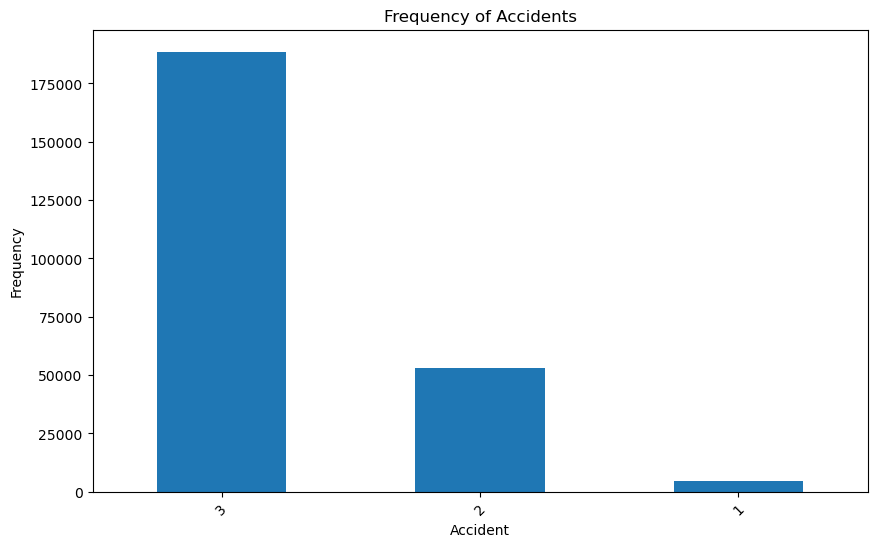

In [13]:
# Create the histogram
accident_counts = final['accident_severity'].value_counts()

# Step 3: Create the bar plot
plt.figure(figsize=(10, 6))
accident_counts.plot(kind='bar')
plt.xlabel('Accident')
plt.ylabel('Frequency')
plt.title('Frequency of Accidents')
plt.xticks(rotation=45)
plt.show()

* Most accident happened in the data appeared to be classed as 3 which is serious.

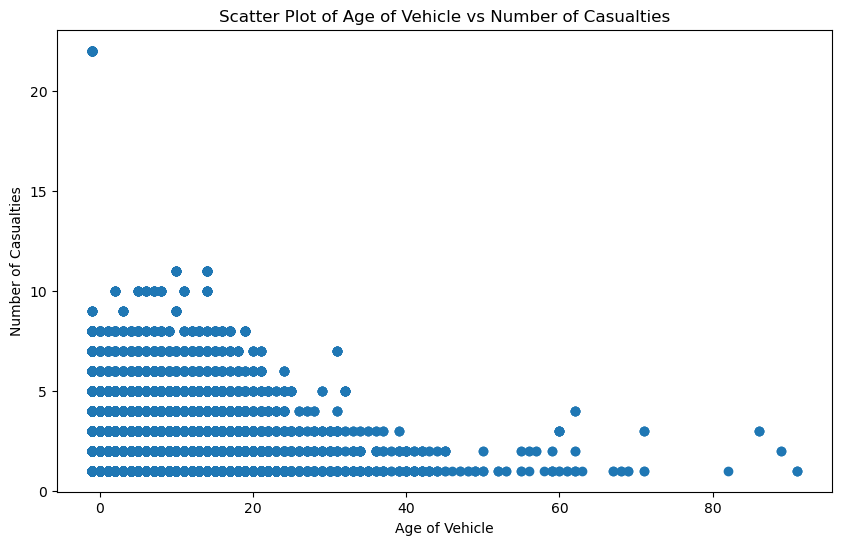

In [14]:
# To plot Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(final['age_of_vehicle'], final['number_of_casualties'])
plt.xlabel('Age of Vehicle')
plt.ylabel('Number of Casualties')
plt.title('Scatter Plot of Age of Vehicle vs Number of Casualties')
plt.show()

Most of the number of causalities are concentrated between 1 to 5 and 

## Splitting Data

In [15]:
# To split the data.
x = final.drop("accident_severity", axis=1)
y = final['accident_severity']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

By splitting the data into training and testing sets, we can evaluate how well the model performs on data it hasn't seen before, which helps us understand how well it can generalize to new instances. This process is crucial in preventing overfitting, which occurs when the model becomes too specialized in the training data and struggles to make accurate predictions on unfamiliar data. 
* x: This is the input data or the features of your dataset excluding the target variable which is 'accident_severity' 
* y: This is the target variable which 'accident_severity'

In [16]:
#To check the dimension of splitted data.
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(172419, 80)
(73895, 80)
(172419,)
(73895,)


* xtrain has a shape of (172419, 80) which means that it contains 172,419 samples with 80 features.

* xtest has a shape of (73895, 80) which means that it contains 73,895 samples with 80 features.

* ytrain has a shape of (172419) which means that it contains 172,419 samples, but it does not specify the number of columns as there is only one target variable - accident_severity.

* ytest has a shape of (73895) which means that the testing set of the target variable contains 73,895 samples.

## Variable Selection


In [17]:
# List of columns to be dropped from the 'xtrain' DataFrame
drop_columns = ['accident_index','accident_reference_x','accident_year_x','location_easting_osgr','location_northing_osgr',
                'longitude','latitude','police_force','local_authority_district','local_authority_ons_district',
                'first_road_class','first_road_number','junction_detail','junction_control','second_road_class',
                'second_road_number','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities','time',
                'road_surface_conditions','special_conditions_at_site','carriageway_hazards','urban_or_rural_area',
                'did_police_officer_attend_scene_of_accident','trunk_road_flag','lsoa_of_accident_location',
                'accident_year_y','accident_reference_y','vehicle_reference_x','casualty_reference','age_band_of_casualty',
                'pedestrian_location','pedestrian_movement','bus_or_coach_passenger','pedestrian_road_maintenance_worker',
                'casualty_home_area_type','casualty_imd_decile','lsoa_of_casualty','accident_year','accident_reference',
                'vehicle_reference_y','towing_and_articulation','vehicle_direction_from','vehicle_direction_to',
                'vehicle_location_restricted_lane','junction_location','skidding_and_overturning','hit_object_in_carriageway',
                'vehicle_leaving_carriageway','hit_object_off_carriageway','vehicle_left_hand_drive',
                'journey_purpose_of_driver','age_band_of_driver','driver_imd_decile','lsoa_of_driver',
                'light_conditions','weather_conditions','age_of_casualty','car_passenger','sex_of_casualty',
                'casualty_class','generic_make_model','propulsion_code','casualty_type','first_point_of_impact','vehicle_manoeuvre',
                'local_authority_highway']
# Dropping the specified columns from the 'xtrain' DataFrame
xtrain = xtrain.drop(columns=drop_columns)

* The above varibles are removed from further analysis from experts opinion. These variables are less relevent when compared to other variables in the data set and it will not be able to predict the severity of accident in the right way and may overfit the model  which may result in misleading conclusions. 
* The variables like light conditions, wheather conditions are accident circumstances that would be unknown at production time.

##  Data Cleaning
By cleaning the data, you improve data quality, reduce potential biases or errors, and ensure that the data is suitable for accurate analysis, modeling, and obtaining reliable insights

In [18]:
#Finding duplicates.
duplicate_rows=xtrain[xtrain.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (32079, 13)


In [19]:
#drop duplicates.
xtrain = xtrain.drop_duplicates()
xtrain.shape

(140340, 13)

There are 144846 rows and 14 coloumns after removing duplicates.

In [20]:
#checking the duplicates.
xtrain.isnull().sum()

number_of_vehicles       0
number_of_casualties     0
day_of_week              0
road_type                0
speed_limit              0
vehicle_type             0
sex_of_driver            0
age_of_driver            0
engine_capacity_cc       0
age_of_vehicle           0
driver_home_area_type    0
casualty_severity        0
Month                    0
dtype: int64

No duplicates are found and now we are removing the rows that contain -1 values which are outliers.

In [21]:
# Filter out rows from xtrain that contain any value of -1 in any column
xtrain = xtrain[~(xtrain == -1).any(axis=1)]
xtrain.shape

(81526, 13)

In [22]:
# Filter xtrain dataset to keep only rows where vehicle_type is 9
xtrain=xtrain[xtrain.vehicle_type==9]
xtrain.shape

(63948, 13)

In [23]:
# Randomly sample 7,000 rows from xtrain dataset
xtrain = xtrain.sample(n=7000, random_state=7)
# Print the sampled DataFrame
xtrain.shape

(7000, 13)

* Working with a smaller subset of data can significantly reduce computational requirements, especially when dealing with large datasets and To minimize the impact of sampling noise.

In [24]:
#Updating the dependent variable to reflect the same as the dataset
ytrain = ytrain[xtrain.index] 
ytrain.shape

(7000,)

Accident Index is used as labels to identy the specific case.

In [25]:
# List of columns to be dropped from the 'xtrain' DataFrame
drop_columns = ['accident_index','accident_reference_x','accident_year_x','location_easting_osgr','location_northing_osgr','longitude','latitude','police_force',
                   'local_authority_district','local_authority_ons_district','first_road_class','first_road_number',
                   'junction_detail','junction_control','second_road_class','second_road_number',
                   'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities','time',
                   'road_surface_conditions','special_conditions_at_site','carriageway_hazards','urban_or_rural_area',
                   'did_police_officer_attend_scene_of_accident','trunk_road_flag','lsoa_of_accident_location',
                   'accident_year_y','accident_reference_y','vehicle_reference_x','casualty_reference','age_band_of_casualty',
                   'pedestrian_location','pedestrian_movement','bus_or_coach_passenger','pedestrian_road_maintenance_worker',
                   'casualty_home_area_type','casualty_imd_decile','lsoa_of_casualty','accident_year','accident_reference',
                   'vehicle_reference_y','towing_and_articulation','vehicle_direction_from','vehicle_direction_to',
                   'vehicle_location_restricted_lane','junction_location','skidding_and_overturning','hit_object_in_carriageway',
                   'vehicle_leaving_carriageway','hit_object_off_carriageway','vehicle_left_hand_drive','journey_purpose_of_driver',
                  'age_band_of_driver','driver_imd_decile','lsoa_of_driver','casualty_type','light_conditions','weather_conditions','age_of_casualty','car_passenger','sex_of_casualty','casualty_class','generic_make_model','propulsion_code','first_point_of_impact','vehicle_manoeuvre','local_authority_highway']
# Dropping the specified columns from the 'xtrain' DataFrame
xtest = xtest.drop(columns=drop_columns)

In [26]:
#Finding duplicates
duplicate_rows=xtest[xtest.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (7026, 13)


In [27]:
#drop duplicates
xtest = xtest.drop_duplicates()
xtest.shape

(66869, 13)

In [28]:
#checking the duplicates
xtest.isnull().sum()

number_of_vehicles       0
number_of_casualties     0
day_of_week              0
road_type                0
speed_limit              0
vehicle_type             0
sex_of_driver            0
age_of_driver            0
engine_capacity_cc       0
age_of_vehicle           0
driver_home_area_type    0
casualty_severity        0
Month                    0
dtype: int64

In [29]:
# Filter out rows from xtrain that contain any value of -1 in any column
xtest = xtest[~(xtest == -1).any(axis=1)]
xtest.shape

(38673, 13)

In [30]:
# Filter xtrain dataset to keep only rows where vehicle_type is 9
xtest=xtest[xtest.vehicle_type==9]
xtest.shape

(30659, 13)

In [31]:
# Randomly sample 10,000 rows from xtrain dataset
xtest = xtest.sample(n=3000, random_state=7)
# Print the sampled DataFrame
xtest .shape

(3000, 13)

In [32]:
ytest = ytest[xtest.index] # Updating the dependent variable to reflect the same as the dataset
ytest.shape

(3000,)

* Coverting categorical variables into dummy variables so that we can have more control on making models for predictions in train and test data:

In [33]:
#Select the categorical columns to encode
categorical_columns = ['day_of_week','road_type','speed_limit','vehicle_type', 'sex_of_driver',
                       'driver_home_area_type', 'casualty_severity','Month']

#Perform one-hot encoding on the categorical columns
xtrain = pd.get_dummies(xtrain, columns=categorical_columns)

In [34]:
#Select the categorical columns to encode
categorical_columns = ['day_of_week','road_type','speed_limit','vehicle_type', 'sex_of_driver',
                       'driver_home_area_type', 'casualty_severity','Month']

#Perform one-hot encoding on the categorical columns
xtest = pd.get_dummies(xtest, columns=categorical_columns)

In [35]:
xtest.head()

,number_of_vehicles,number_of_casualties,age_of_driver,engine_capacity_cc,age_of_vehicle,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
172110,2,1,42,1200,2,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
126770,2,1,48,1339,17,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
92193,2,1,42,1590,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72145,3,1,22,999,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
58712,1,1,47,1398,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
xtrain.head()

,number_of_vehicles,number_of_casualties,age_of_driver,engine_capacity_cc,age_of_vehicle,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
98492,2,1,34,1461,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4984,2,1,27,2979,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108819,4,2,51,1998,13,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
156165,3,2,36,1598,8,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
239527,2,3,41,998,2,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
#info about the data
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 98492 to 21933
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   number_of_vehicles       7000 non-null   int64
 1   number_of_casualties     7000 non-null   int64
 2   age_of_driver            7000 non-null   int64
 3   engine_capacity_cc       7000 non-null   int64
 4   age_of_vehicle           7000 non-null   int64
 5   day_of_week_1            7000 non-null   uint8
 6   day_of_week_2            7000 non-null   uint8
 7   day_of_week_3            7000 non-null   uint8
 8   day_of_week_4            7000 non-null   uint8
 9   day_of_week_5            7000 non-null   uint8
 10  day_of_week_6            7000 non-null   uint8
 11  day_of_week_7            7000 non-null   uint8
 12  road_type_1              7000 non-null   uint8
 13  road_type_2              7000 non-null   uint8
 14  road_type_3              7000 non-null   uint8
 15 

In [40]:
#to load the first 5 rows
xtest.head()

,number_of_vehicles,number_of_casualties,age_of_driver,engine_capacity_cc,age_of_vehicle,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
172110,2,1,42,1200,2,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
126770,2,1,48,1339,17,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
92193,2,1,42,1590,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72145,3,1,22,999,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
58712,1,1,47,1398,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
#to get the info aboutthe data
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 172110 to 50480
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   number_of_vehicles       3000 non-null   int64
 1   number_of_casualties     3000 non-null   int64
 2   age_of_driver            3000 non-null   int64
 3   engine_capacity_cc       3000 non-null   int64
 4   age_of_vehicle           3000 non-null   int64
 5   day_of_week_1            3000 non-null   uint8
 6   day_of_week_2            3000 non-null   uint8
 7   day_of_week_3            3000 non-null   uint8
 8   day_of_week_4            3000 non-null   uint8
 9   day_of_week_5            3000 non-null   uint8
 10  day_of_week_6            3000 non-null   uint8
 11  day_of_week_7            3000 non-null   uint8
 12  road_type_1              3000 non-null   uint8
 13  road_type_2              3000 non-null   uint8
 14  road_type_3              3000 non-null   uint8
 15

In [42]:
#to load the first 5 rows
ytrain.head()

98492     2
4984      3
108819    3
156165    2
239527    3
Name: accident_severity, dtype: int64

In [43]:
#to load the first 5 rows
ytest.head()

172110    3
126770    3
92193     3
72145     3
58712     3
Name: accident_severity, dtype: int64

In [44]:
#count unique values
count= ytrain.value_counts()
print(count)

3    5324
2    1543
1     133
Name: accident_severity, dtype: int64


In [45]:
#count unique values
count= ytest.value_counts()
print(count)

3    2282
2     661
1      57
Name: accident_severity, dtype: int64


#  BASELINE

A baseline model serves as a point of comparison for the performance of more advanced models. It basically serves as a benchmark for assessing the effectiveness of the other models that we will run. 

DummyClassifier was chosen as our baseline model since it generates a threshold. If the model we run does not outperform the baseline model, it is simply classified as unfit and can be depended on.

In [46]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
# Baseline model: DummyClassifier with "most_frequent" strategy
baseline_model = DummyClassifier(strategy="most_frequent")
# Training and evaluating the baseline model
baseline_model.fit(xtrain, ytrain)
baseline_pred = baseline_model.predict(xtest)
baseline_accuracy = accuracy_score(ytest, baseline_pred)
baseline_precision = precision_score(ytest, baseline_pred, average='weighted')
baseline_f1 = f1_score(ytest, baseline_pred, average='weighted')
print("Baseline Accuracy:", baseline_accuracy)
print("Baseline Precision:", baseline_precision)
print("Baseline F1 Score:", baseline_f1)

Baseline Accuracy: 0.7606666666666667
Baseline Precision: 0.5786137777777779
Baseline F1 Score: 0.6572666919096302


# DicisionTreeClassifier

DicisionTreeClassifier is an effective model when it comes to take decisions because they jode down each and every problem and go through all the possible outcomes. It is also easy to understand and it handles both numberic and categorical data.

In [48]:
#Importing required libraries
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()
# Training the model
decision_tree.fit(xtrain, ytrain)
# Makeing predictions 
y_pred_test = decision_tree.predict(xtest)
# Calculating accuracy 
accuracy = accuracy_score(ytest, y_pred_test)
# Calculating precision
precision = precision_score(ytest, y_pred_test, average='weighted')
# Calculating F1 score
f1 = f1_score(ytest, y_pred_test, average='weighted')
print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree F1 Score:", f1)


Decision Tree Accuracy: 0.888
Decision Tree Precision: 0.8930968539461844
Decision Tree F1 Score: 0.8900254103382101


After running the above code we got an accuracy of 0.888 which means that it can predict this model can predict the outcome 88.8% of the time and also the accuracy is greater than our base model.

# K-Nearest Neighbors

The KNN model is a regression machine learning technique. It uses a model to anticipate a new output by looking for the k-nearest feature in the data collection.
We are employing this model because it is straightforward to understand, and it can classify complicated relationship features between dependent and independent variables.


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Create a KNN classifier with 3 neighbors
KNN = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the training data
KNN.fit(xtrain, ytrain)
# Predict the classes of the testing data
y_predict = KNN.predict(xtest)
# Calculate accuracy
accuracy = accuracy_score(ytest, y_predict)
# Calculate precision
precision = precision_score(ytest, y_predict, average='weighted')
# Calculate F1 score
f1 = f1_score(ytest, y_predict, average='weighted')
# Create confusion matrix
cm = confusion_matrix(ytest, y_predict)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F1 Score:', f1)


Accuracy: 0.7476666666666667
Precision: 0.7026928534879755
F1 Score: 0.7107337655839442


After running the above code we got an accuracy of 0.747 which means that it can predict this model can predict the outcome 74.7% of the time and also the accuracy is quite good but as it is lower than our baseline so which makes this model unfit to use , but we can try doing Hyperparameter tuning on the model to see how efficient the model can get.

#     Hyperparameter Tuning

Hyperparameter tuning is used to imporve the model accuracy by avoiding overfitting or underfitting and make the model more effective. Hyperparameter is mainly used on the models whoes accuracy is less than our baseline model. 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid_dt = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_classifier = KNeighborsClassifier()
grid_search_cv = GridSearchCV(knn_classifier, param_grid_dt, cv=5, scoring='accuracy')
grid_search_cv.fit(xtrain, ytrain)
print("Perfect Hyperparameter Tuning for KNN:", grid_search_cv.best_params_)
y_pred_knn = grid_search_cv.predict(xtest)
accuracy = accuracy_score(ytest, y_pred_knn)
print("Accuracy:", accuracy)
rf_rmse_score = np.sqrt(grid_search_cv.best_score_)
print("The best KNN has a RMSE of:", rf_rmse_score)
from sklearn.metrics import f1_score
# Assuming you have true labels in y_testset and predicted labels in y_pred_dt
fscore = f1_score(ytest, y_pred_knn, average='macro')
print("F-score:", fscore)




Perfect Hyperparameter Tuning for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.7963333333333333
The best KNN has a RMSE of: 0.8948263997638233
F-score: 0.45382185246597145


From the above hypermarameter tuning we can see that the accuracy score of our KNN model has increase from 0.747 to 0.796 which means it can predict outputs 79.6% of the time. As we can see that the hyperparameter tuning has served its duty of improving the models accuracy by avoiding overfitting or underfitting.

# Feature Selection

The below code helps us to identify the features which affects our model the most by using two different technique which are :Recursive Feature Elimination (RFE) and Random Forest feature importances. In REF technique the model eliminates the features which have less importance or does not have a much effect on the model where as Random Forest uses tree based model to compute important features.

Selected features from RFE:
Index(['number_of_casualties', 'age_of_driver', 'engine_capacity_cc',
       'age_of_vehicle', 'casualty_severity_3'],
      dtype='object')
Selected features from Random Forest feature importances:
Index(['casualty_severity_3', 'number_of_casualties', 'age_of_driver',
       'engine_capacity_cc', 'age_of_vehicle'],
      dtype='object')


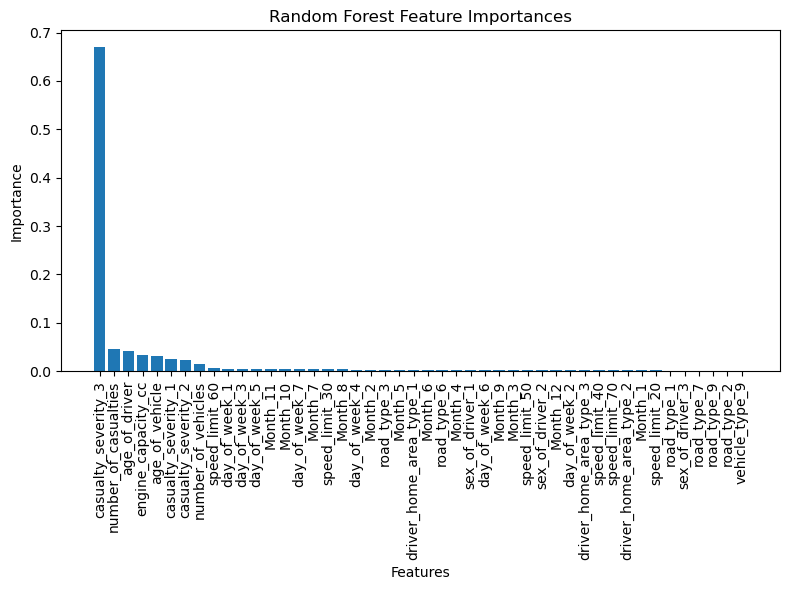

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor model
model = RandomForestRegressor()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=5)
selected_features_rfe = rfe.fit_transform(xtrain, ytrain.values.ravel())

# Get the mask of selected features
feature_mask_rfe = rfe.support_
selected_feature_names_rfe = xtrain.columns[feature_mask_rfe]

# Fit the Random Forest model to the training data
model.fit(xtrain, ytrain.values.ravel())

# Get feature importances from Random Forest
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
selected_features_rf = xtrain.columns[sorted_indices[:5]]

# Print the selected features from RFE
print("Selected features from RFE:")
print(selected_feature_names_rfe)
# Print the selected features from Random Forest feature importances
print("Selected features from Random Forest feature importances:")
print(selected_features_rf)


# Plotting Random Forest feature importances
plt.figure(figsize=(8, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), xtrain.columns[sorted_indices], rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
